# Extracting data summaries and graphics📈
In this notebook we iterate over the *validations.txt* files of each models, that contain the BLEU scores of their steps, to get the max value for each model and the mean and plot the values.

## Imports

In [1]:
import os
import statistics
import matplotlib.pyplot as plt

## Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Defining the root directory

In [3]:
rootdir = '/content/drive/MyDrive/Final-Project-MT'

## Main code

MODEL 1 Max: 2.25096 Mean: 1.8746318348623854
MODEL 2 Max: 3.95789 Mean: 3.5066766483516485
MODEL 3 Max: 3.09229 Mean: 2.3859779120879123
MODEL 4 Max: 3.23769 Mean: 2.633182032967033
MODEL 5 Max: 3.50126 Mean: 2.98042
MODEL 6 Max: 3.7314 Mean: 3.005164098360656
MODEL 7 Max: 3.31576 Mean: 2.9173342307692307
MODEL 8 Max: 2.28016 Mean: 2.0905107303370785
MODEL 9 Max: 1.76762 Mean: 1.5355663483146067
MODEL 10 Max: 4.27596 Mean: 3.7490246703296704




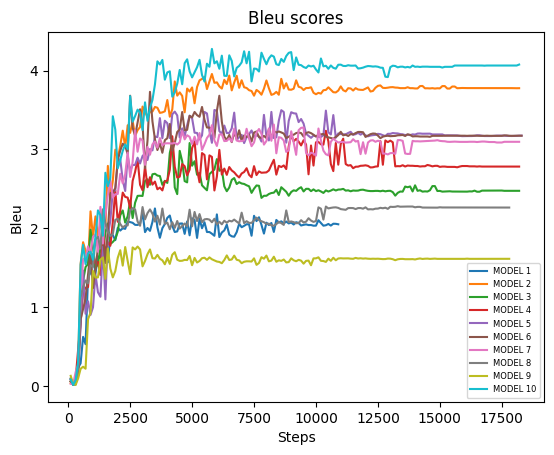

In [5]:
# We define the name of the plot and the two axes.
plt.title("Bleu scores")
plt.xlabel("Steps")
plt.ylabel("Bleu")

# We iterate over the root directory.
for subdir, dirs, files in os.walk(rootdir):
    # We sort the directories by their number
    def sorting(s):
      try:
        n = int(s[5:])
      except:
        n = 0
      return n
    dirs.sort(key=sorting)
    # We iterate over the subdirectories of the root directory
    for d in dirs:
      # We create a path joining the root directory, the name of the subdirectory and the files we want to check
      path = os.path.join(subdir, d, "validations.txt")
      # We check whether validations.txt exists in this subdirectory
      if os.path.exists(path):
        # We open the file
        with open(path,'r') as validations:
            # We split the file in lines
            file = validations.read().split("\n")
            # We initialize the lists bleu and steps, that will store this values
            bleu = []
            steps = []
            # We iterate over the lines
            for line in file:
              # We check that the line is not empty
              if line != "":
                # We append the bleu and number of steps for each of the lines
                bleu.append(float(line.split("\t")[3][6:]))
                steps.append(float(line.split("\t")[0][6:]))
            # We plot the final graph for the model
            plt.plot(steps, bleu, label=d)
            plt.legend(prop = { "size": 6},loc="best" )
            # We print the max bleu and the mean of all the bleus
            print(d+" Max: "+str(max(bleu))+" Mean: "+str(statistics.mean(bleu)))
print("\n")
# We show all the plots in the same graph
plt.show()